In [15]:
import numpy as np
import matplotlib.pyplot as plt

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
     Id  SepalLengthCm
0     1            5.1
1     2            4.9
2     3            4.7
3     4            4.6
4     5            5.0
..  ...            ...
95   96            5.7
96   97            5.7
97   98            6.2
98   99            5.1
99  100            5.7

[100 rows x 2 columns]


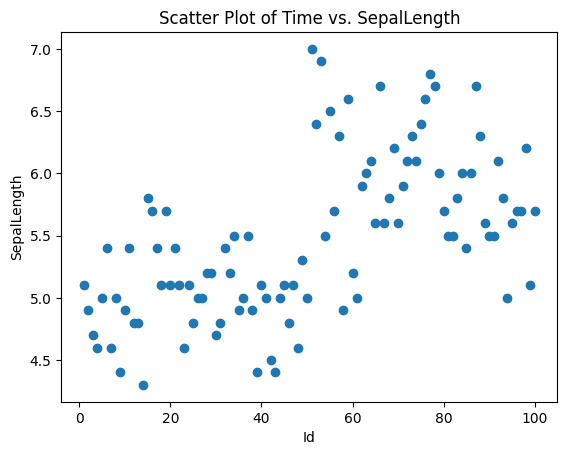

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Iris.csv', sep=',')


df = df[:100]
print(df.head())


selected_columns = df[['Id', 'SepalLengthCm']]
print(selected_columns)

# Convert the DataFrame to a numpy array
xArr = selected_columns[['Id']]
yArr = selected_columns[['SepalLengthCm']]

xArr = np.array(xArr).flatten()
yArr = np.array(yArr).flatten()


# Plot the data
plt.scatter(xArr, yArr)
plt.xlabel('Id')
plt.ylabel('SepalLength')
plt.title('Scatter Plot of Time vs. SepalLength')
plt.show()


In [17]:
noOfPoints = 100

In [18]:
# xVals = np.linspace(0,10,noOfPoints)

# yVals = 2*np.sin(xVals)/np.cos(xVals/2)
# # yVals = np.cos(xVals) + np.random.normal(0, 0.1, noOfPoints)

# xArr = np.array(xVals)
# yArr = np.array(yVals)

<Figure size 640x480 with 0 Axes>

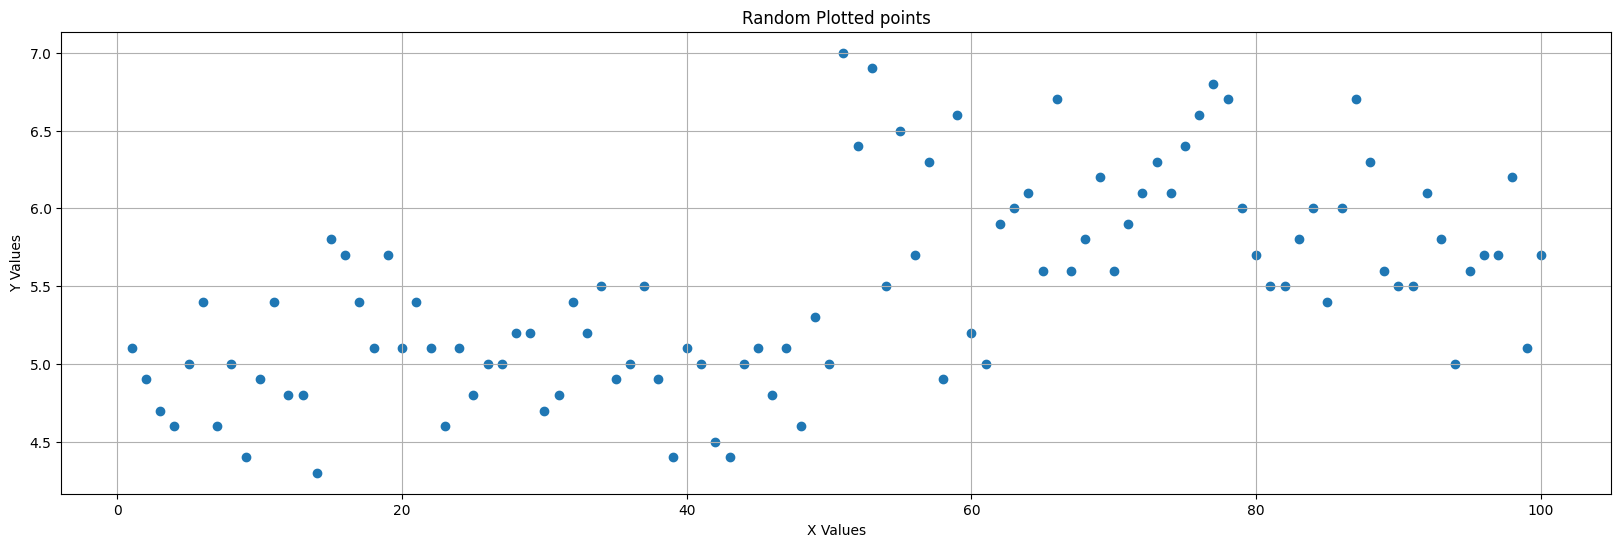

In [19]:
plt.clf()
plt.figure(figsize=(20,6))

plt.scatter(xArr,yArr)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Random Plotted points")

plt.grid(1)


In [20]:
noOfSplines = xArr.size - 1
noOfSplines

99

##### Computing H values, step size

In [21]:


hArr = np.zeros(noOfSplines)

for j in range(0,noOfSplines):
    hArr[j] = xArr[j+1] - xArr[j]
    # plt.plot(xArr[j:j+2],yArr[j:j+2])
print(hArr.shape)

(99,)


#### Computing Alpha Values

In [22]:
alphaArr = np.array(yArr)

#### Computing B Values


In [23]:
bArr = np.zeros(noOfSplines+1)

for i in range (1,noOfSplines):
    bArr[i] = (3/hArr[i])*(alphaArr[i+1]-alphaArr[i])-(3/hArr[i-1])*(alphaArr[i]-alphaArr[i-1])

# print(bArr)

#### Computing A Values

In [24]:
aArr = np.zeros((noOfSplines+1,noOfSplines+1))

# print(aArr)


for i in range (1,noOfSplines):
    aArr[i][i-1]=hArr[i-1]
    aArr[i][i+1]=hArr[i]
    aArr[i][i]=2*(hArr[i-1]+hArr[i])

aArr[0][0] = 1
aArr[-1][-1] = 1
print(aArr)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 4. 1. ... 0. 0. 0.]
 [0. 1. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 4. 1. 0.]
 [0. 0. 0. ... 1. 4. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Computing Gamma 

In [25]:
# gammaArr = np.zeros((noOfSplines+1,noOfSplines+1))

# gammaArr = np.matmul(aArr,bArr)
gammaArr = np.matmul(np.linalg.inv(aArr),bArr)


# print(gammaArr)

##### Computing Beta and Delta

In [26]:
betaArr = np.zeros(noOfSplines)
deltaArr = np.zeros(noOfSplines)

for i in range (0,noOfSplines):
    betaArr[i]=(1/hArr[i])*(alphaArr[i+1]-alphaArr[i])-(hArr[i]/3)*(2*gammaArr[i]+gammaArr[i+1])
    deltaArr[i]=(gammaArr[i+1]-gammaArr[i])/(3*hArr[i])



<Figure size 640x480 with 0 Axes>

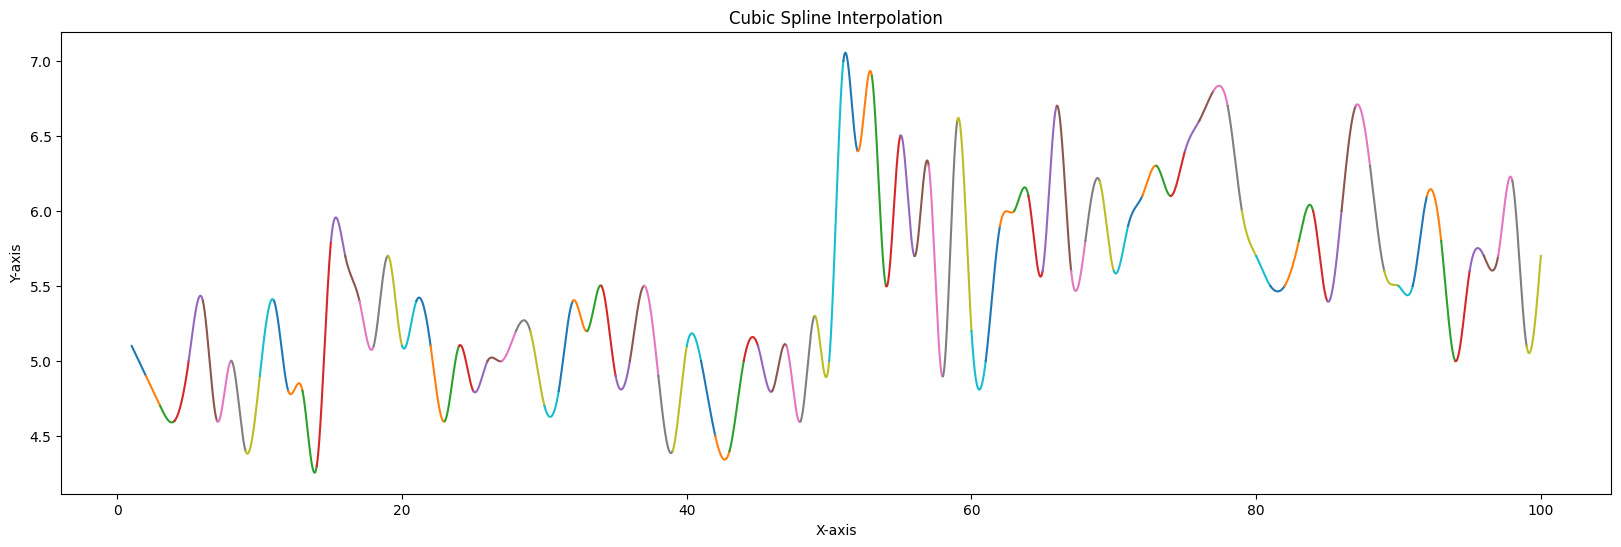

In [27]:
plt.clf()
plt.figure(figsize=(20,6))

for i in range(0, noOfSplines):
    x = np.arange(xArr[i], xArr[i+1] + 0.00005, 0.00005)
    spline_i = alphaArr[i] + betaArr[i]*(x-xArr[i]) + gammaArr[i]*(x-xArr[i])**2 + deltaArr[i]*(x-xArr[i])**3
    plt.plot(x, spline_i)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation')
plt.show()


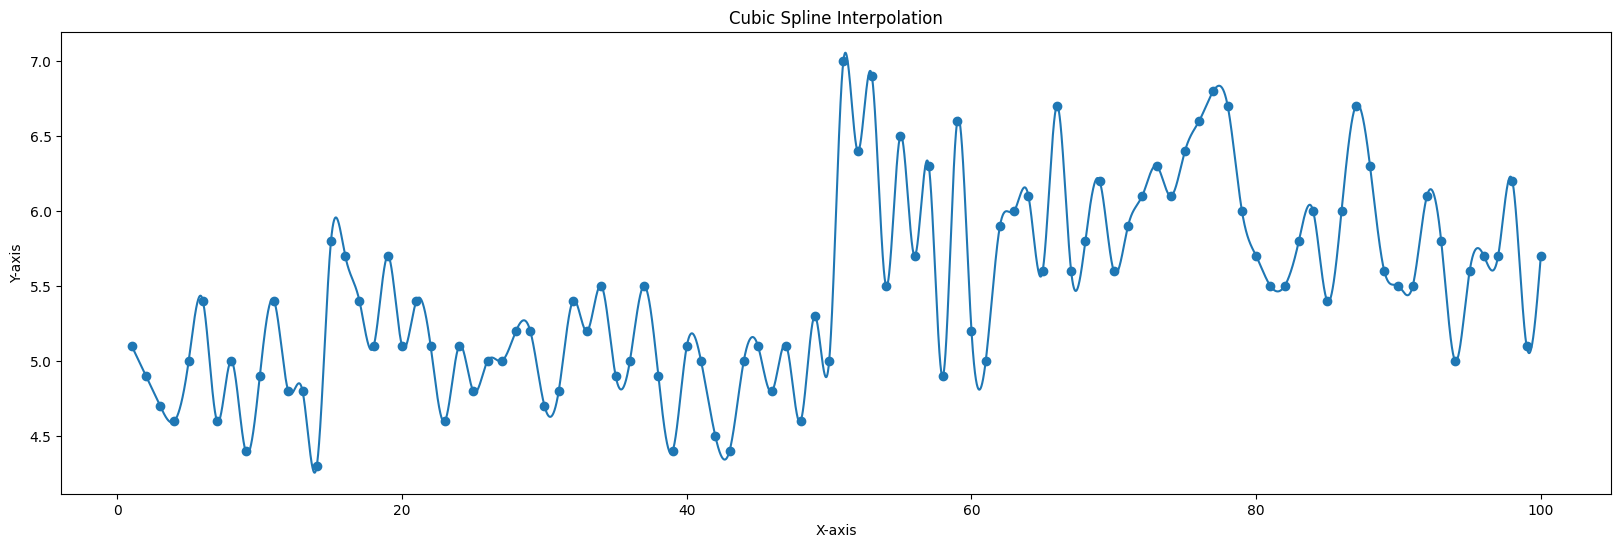

In [28]:
xVALS = []
yVALS = []

plt.figure(figsize=(20, 6))
for i in range(0,noOfSplines):
    x = np.arange(xArr[i], xArr[i+1] + 0.00005, 0.00005)
    spline_i = alphaArr[i] + betaArr[i]*(x-xArr[i]) + gammaArr[i]*(x-xArr[i])**2 + deltaArr[i]*(x-xArr[i])**3
    xVALS.extend(x)
    yVALS.extend(spline_i)
plt.scatter(xArr, yArr, label='Data Points')

plt.plot(xVALS, yVALS)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation')
plt.show()